In [1]:
"""Build a machine learning model to predict whether a person makes over 50K a year or not"""
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('classification_2.csv',skipinitialspace=True)
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.rename(columns={'39': 'Age', 'State-gov': 'Workclass','77516':'Fnlwgt','Bachelors':'Education','13':'Education_Num','Never-married':'Marital_status','Adm-clerical':'Occupation',
                     'Not-in-family':'Relationship','White':'Race','Male':'Sex','2174':'Capital Gain','0':'Capital Loss',
                    '40':'Hours per week','United-States':'Country','<=50K':'ZTarget'},inplace=True)
data.head()

,Age,Workclass,Fnlwgt,Education,Education_Num,Marital_status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,ZTarget
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.skew()

Age                0.558738
Fnlwgt             1.446972
Education_Num     -0.311630
Capital Gain      11.953690
Capital Loss       4.594549
Hours per week     0.227636
dtype: float64

0.18906569227479078


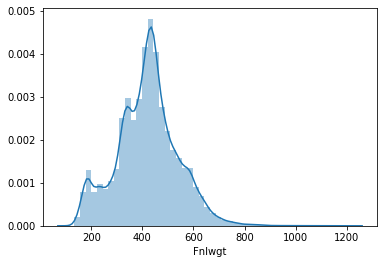

In [5]:
#Handling Skewness
sb.distplot(np.sqrt(data['Fnlwgt']))
print(np.sqrt(data['Fnlwgt']).skew())

In [6]:
data['Fnlwgt'] = np.sqrt(data['Fnlwgt'])

In [7]:
data.drop(['Relationship','Marital_status','Race'],axis= 1,inplace=True)

In [8]:
data['A0'] = np.ones((len(data),1))
data.ZTarget.replace(('>50K', '<=50K'), (1, 0), inplace = True)

In [9]:
data['Fnlwgt'] = (data['Fnlwgt'] - data['Fnlwgt'].mean()) / (data['Fnlwgt'].std())
data['Age'] = (data['Age'] - data['Age'].mean()) / (data['Age'].std())
data['Education_Num'] = (data['Education_Num'] - data['Education_Num'].mean()) / (data['Education_Num'].std())
data['Capital Gain'] = (data['Capital Gain'] - data['Capital Gain'].mean()) / (data['Capital Gain'].std())
data['Capital Loss'] = (data['Capital Loss']-data['Capital Loss'].mean())/(data['Capital Loss'].std())
data['Hours per week'] = (data['Hours per week'] - data['Hours per week'].mean()) / (data['Hours per week'].std())
data.head()

,Age,Workclass,Fnlwgt,Education,Education_Num,Occupation,Sex,Capital Gain,Capital Loss,Hours per week,Country,ZTarget,A0
0,0.837084,Self-emp-not-inc,-1.088489,Bachelors,1.134761,Exec-managerial,Male,-0.145911,-0.21666,-2.222086,United-States,0,1.0
1,-0.042640,Private,0.380187,HS-grad,-0.420020,Handlers-cleaners,Male,-0.145911,-0.21666,-0.035429,United-States,0,1.0
2,1.057015,Private,0.548190,11th,-1.197411,Handlers-cleaners,Male,-0.145911,-0.21666,-0.035429,United-States,0,1.0
3,-0.775743,Private,1.360908,Bachelors,1.134761,Prof-specialty,Female,-0.145911,-0.21666,-0.035429,Cuba,0,1.0
4,-0.115950,Private,0.957537,Masters,1.523457,Exec-managerial,Female,-0.145911,-0.21666,-0.035429,United-States,0,1.0


In [10]:
data=pd.get_dummies(data=data,drop_first=True)
data = data.reindex(columns = sorted(data.columns))
data.head()

,A0,Age,Capital Gain,Capital Loss,Country_Cambodia,Country_Canada,Country_China,Country_Columbia,Country_Cuba,Country_Dominican-Republic,...,Sex_Male,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,ZTarget
0,1.0,0.837084,-0.145911,-0.21666,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1.0,-0.042640,-0.145911,-0.21666,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1.0,1.057015,-0.145911,-0.21666,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1.0,-0.775743,-0.145911,-0.21666,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,-0.115950,-0.145911,-0.21666,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
data.shape

(32560, 87)

In [12]:
Training_data = int(0.70*len(data))
Train_data = data.iloc[0:Training_data,:]
Test_data = data.iloc[Training_data:,:]


x_train,y_train,x_test,y_test = np.array(Train_data.iloc[:,0:86]),np.array(Train_data.iloc[:,-1:]),np.array(Test_data.iloc[:,0:86]),np.array(Test_data.iloc[:,-1:])

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((22792, 86), (22792, 1), (9768, 86), (9768, 1))

In [14]:
np.random.seed(0)
theta = np.random.rand(86)

In [15]:
theta = np.reshape(theta,(86,1))

In [16]:
def model(x_train,y_train,theta):
    learning_rate = 0.0001
    epochs = 15000
    n = len(x_train)

    for epoch in range(epochs):
        y_pred = np.dot(x_train ,theta)
        temp = y_pred - y_train
        product = (learning_rate / n) * np.dot(x_train.T,temp)
        theta = theta - product
        cost = (1 / (2 * n)) * np.dot(temp.T, temp)
    return theta

In [17]:
theta = model(x_train,y_train,theta)
Y = np.dot(x_test,theta)

In [18]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid
S=sigmoid(Y)
print(S)

[[0.58460084]
 [0.45919432]
 [0.31197096]
 ...
 [0.52981017]
 [0.27153571]
 [0.73552226]]


In [19]:
def check_prediction(z):
    prediction = [ ]
    for element in z:
        if element >= 0.5:
            prediction.append(1)
        elif element <0.5:
            prediction.append(0)
    return prediction
x = check_prediction(S)

In [20]:
def check_accuracy(x):
    accuracy = 0
    for element in range(len(x)):
        if(y_test[element] == x[element]):
            accuracy +=1
    acc = (accuracy / len(x)) * 100
    return acc

accuracy = check_accuracy(x)
print(accuracy)


49.02743652743653


In [21]:
score = accuracy_score(y_test,x)
print(score)

0.4902743652743653
